<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

np.column_stack(([1,2,3],[4,5,6]))

결과값 => array([[1,4],[2,5],[3,6]])

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length,fish_weight))

In [5]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.concatenate()하게 되면 가로로 붙여줌

In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


##훈련 세트/ 테스트 세트 나누기

굳이 우리가 나눌 필요 없이 sklearn에서 train_test_split모듈 제공

In [12]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [14]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


도미와 빙어 데이터 비율 35:14로 대략 2.5:1

아래 랜덤한 데이터 비율은 10:3으로 대략 3.3:1

샘플링 편향 발생

In [15]:
print(test_target)   #랜덤 추출 확인
#비율이 어긋남


[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


train_test_split에서 stratify 매개변수 추가

In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,stratify = fish_target, random_state = 42)

###아래 결과값을 보면 어느 정도 맞는 모습

In [17]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

##머신러닝 시작

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

###특이값 넣어보기

In [19]:
print(kn.predict([[25,150]]))

[0.]


###예상한 결과와 다르기 때문에 산점도 찍어보기

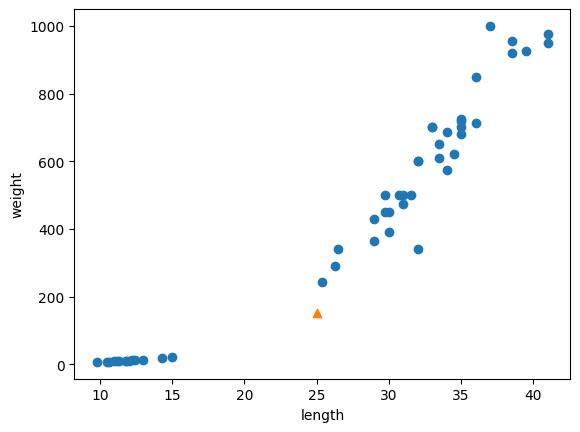

In [24]:
import matplotlib.pyplot as plt

plt.scatter(fish_data[:,0],fish_data[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

특이점과 어떤 점이 가까이 있는지 판단하기

In [25]:
distances, indexes = kn.kneighbors([[25,150]])

###아래 scatterplot을 보게 되면 빙어 쪽에 압도적으로 많음

###knn은 가장 가까운 이웃 (default값=5)을 보고 판단하기 때문에 빙어라고 판단

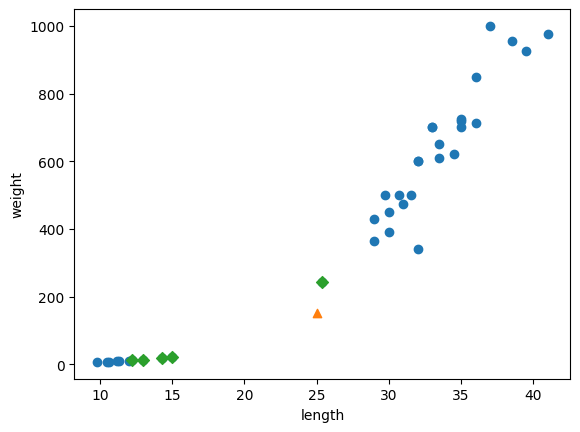

In [27]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = "D")
plt.xlabel('length')
plt.ylabel("weight")
plt.show()

### 왜 이런 오류가 발생했을까??
---
. length와 weight의 비율이 달라 거리의 비율이 깨짐
  그래프 상 봤을 때 주황색 데이터와 가장 가까운 도미 데이터의 길이가 주황색 데이터와 가장 가까운 빙어 데이터보다 훨씬 가까워 보임.
  
  하지만 유클리안 거리를 썼을 때 weight와 length의 비율이 달라 크게 차이나지 않는 것을 확인 가능

xlim을 통해 x축의 범위를 y와 동일하게 0~1000으로 맞춰 그래프를 그리기

그래프를 보면 거의 일직선으로 나타남

-->length와 weight의 scale이 달라 length는 큰 고려사항이 되지 않음


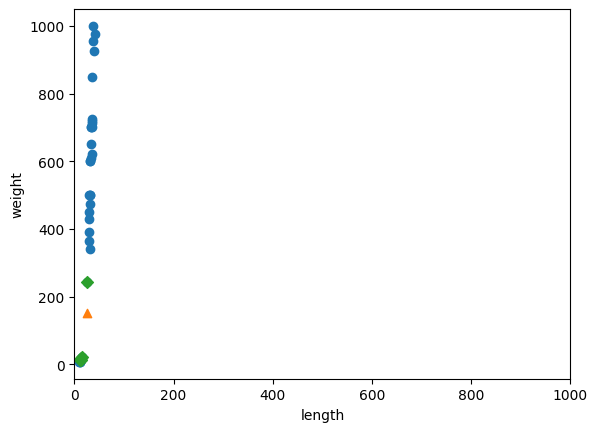

In [28]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker = "D")
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel("weight")
33plt.show()

##데이터 전처리를 통해 일정한 기준으로 맞추기

여기에서는 표준점수 (Z점수)사용
    표준점수 = (값 - 평균)/표준편차